In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [19]:
sns.set_style("ticks",
             rc = {'axes.grid' : True,
                  'grid.linestyle' : 'dashed'})

sns.set_context('poster')
sns.set_palette("Set2")

In [28]:
df_full = pd.read_pickle('./output/base_plikHM_TTTEEE_lowTEB_lp.pkl')
df_full = df_full.reindex(np.arange(len(df_full)))

In [84]:
params = ['cf_peak', 'cf_dip', 'lp','omegabh2', 'omegach2', 'H0*', 'tau', 'A*', 'ns', 'rdrag*']
df = df_full[params].copy()
df.loc[:,'lp'] = df_full.loc[:,'lp']/(df_full.loc[:,'H0*']/100)
df.loc[:,'cf_peak'] = df_full.loc[:,'cf_peak']/(df_full.loc[:,'H0*']/100)
df.loc[:,'cf_dip'] = df_full.loc[:,'cf_dip']/(df_full.loc[:,'H0*']/100)

In [93]:
ptest = ['omegach2', 'lp']

In [103]:
sns.utils.ci(df[['lp','omegabh2']].values, which=68)

array([  2.21782412e-02,   1.38357711e+02])

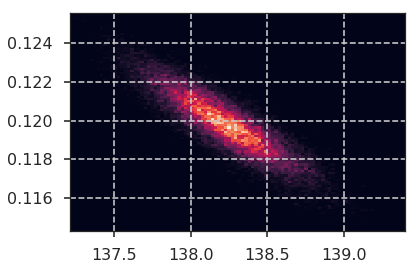

In [130]:
Z = plt.hist2d(df['lp'],df['omegach2'],bins=100, weights=df_full['weight'])[0]

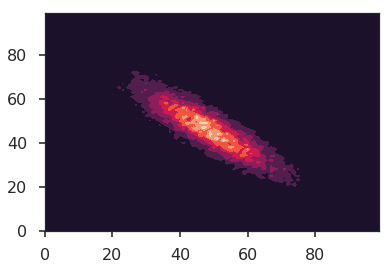

In [132]:
plt.contourf(Z)

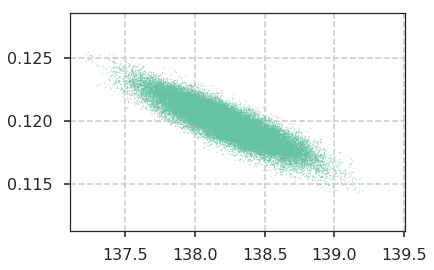

In [110]:
plt.scatter(df['lp'],df['omegach2'], s=1, alpha=0.3)

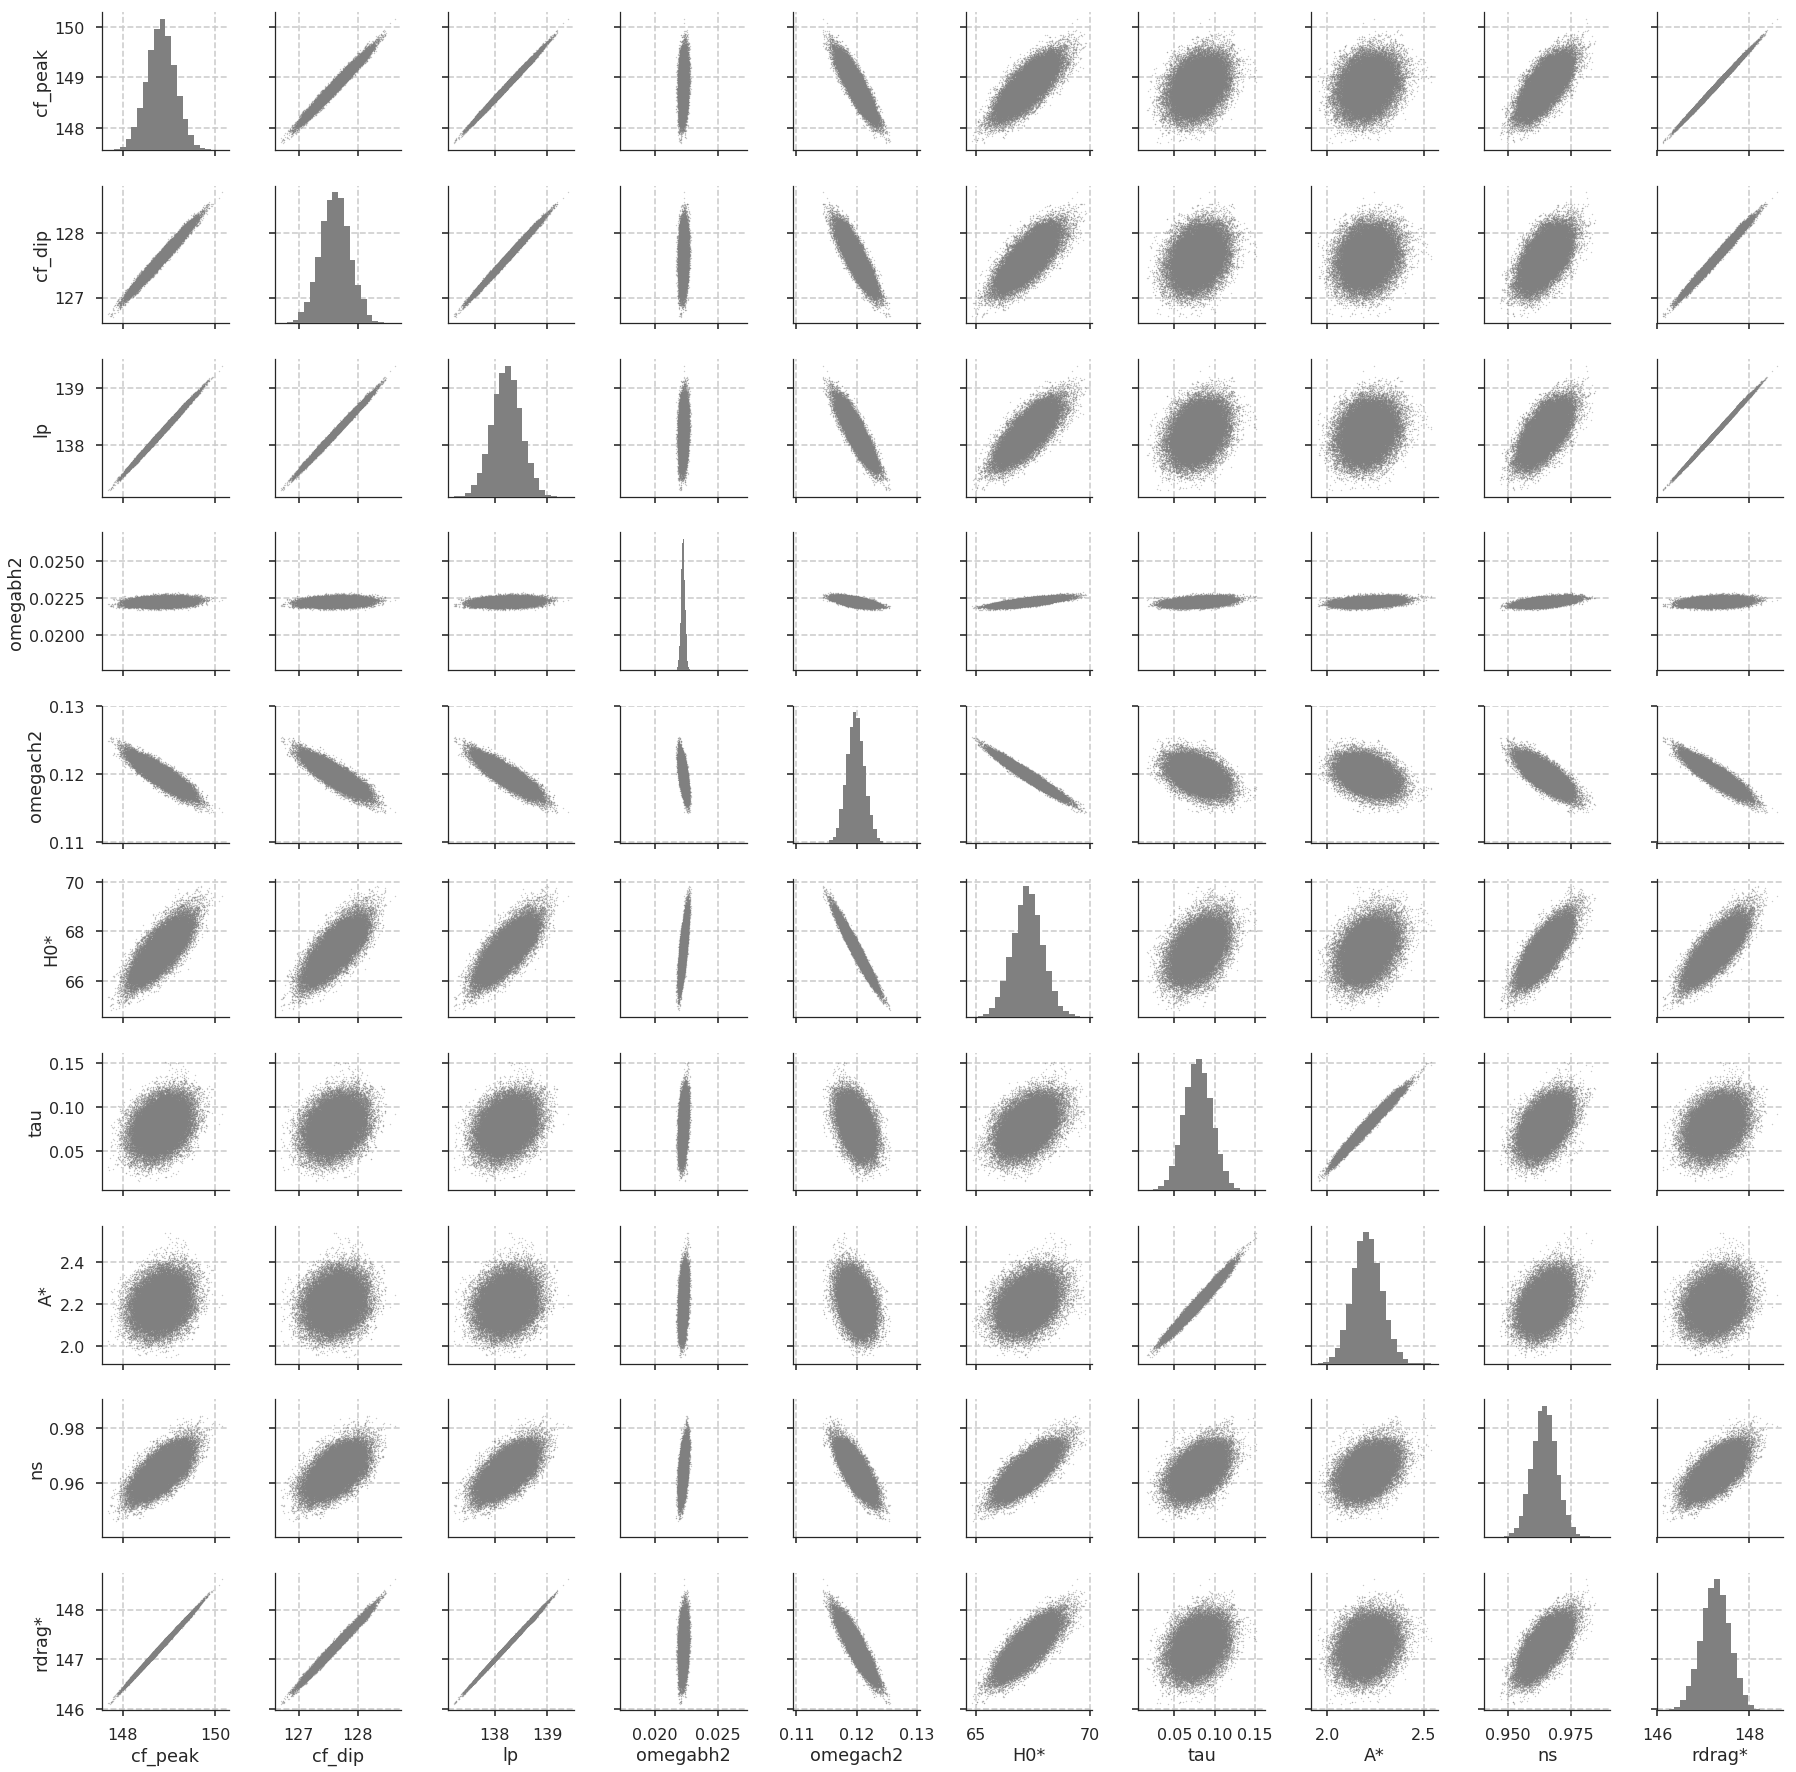

In [138]:
ax = sns.PairGrid(df[params], diag_sharey=False)
ax.map_offdiag(plt.scatter, s = 1, alpha = 0.3, color = 'gray')
ax.map_diag(plt.hist, bins=20,color='gray',weights=df_full['weight'])


plt.show()

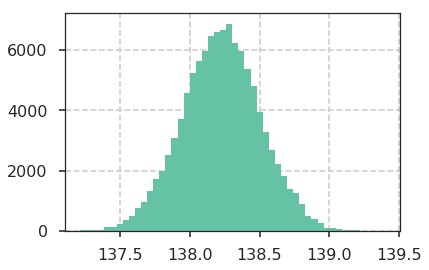

In [144]:
plt.hist(df['lp'],bins=50,weights=df_full['weight']);

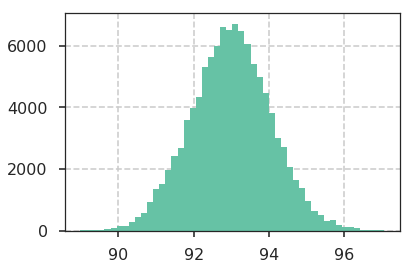

In [145]:
plt.hist(df_full['lp'],bins=50,weights=df_full['weight']);